In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [2]:
df = pd.read_csv('../code/clean_data/preprocessed_data.csv')

In [3]:
df

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,hsc_Arts,hsc_Commerce,hsc_Science,degree_Comm&Mgmt,degree_Others,degree_Sci&Tech
0,0,67.00,91.00,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,0,79.33,78.33,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,0,65.00,68.00,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,0,56.00,52.00,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,0,85.80,73.60,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0,80.60,82.00,77.60,0,91.0,0,74.49,1,0,1,0,1,0,0
203,0,58.00,60.00,72.00,0,74.0,0,53.62,1,0,0,1,0,0,1
204,0,67.00,67.00,73.00,1,59.0,0,69.72,1,0,1,0,1,0,0
205,1,74.00,66.00,58.00,0,70.0,1,60.23,1,0,1,0,1,0,0


In [4]:
X = df.drop(columns=['status'], axis=1)
y = df['status']

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Random Forests

In [7]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9124168514412416


In [8]:
ytrain_pred

array([[0.93, 0.07],
       [0.03, 0.97],
       [0.  , 1.  ],
       [0.11, 0.89],
       [0.96, 0.04],
       [0.12, 0.88],
       [0.96, 0.04],
       [0.07, 0.93],
       [0.  , 1.  ],
       [0.85, 0.15],
       [0.87, 0.13],
       [0.02, 0.98],
       [0.03, 0.97],
       [0.87, 0.13],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.05, 0.95],
       [0.03, 0.97],
       [0.03, 0.97],
       [0.15, 0.85],
       [0.12, 0.88],
       [0.98, 0.02],
       [0.02, 0.98],
       [0.77, 0.23],
       [0.89, 0.11],
       [0.9 , 0.1 ],
       [0.74, 0.26],
       [0.13, 0.87],
       [0.08, 0.92],
       [0.77, 0.23],
       [0.05, 0.95],
       [0.26, 0.74],
       [0.23, 0.77],
       [0.1 , 0.9 ],
       [0.04, 0.96],
       [0.05, 0.95],
       [0.17, 0.83],
       [0.  , 1.  ],
       [0.12, 0.88],
       [0.04, 0.96],
       [0.89, 0.11],
       [0.09, 0.91],
       [0.21, 0.79],
       [0.01, 0.99],
       [0.7 , 0.3 ],
       [0.09, 0.91],
       [0.14, 0.86],
       [0.03,

## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9459134615384615
Logistic test roc-auc: 0.9157427937915743


C:\Users\aksha\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Adaboost Classifier

In [10]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 1.0
Adaboost test roc-auc: 0.8991130820399114


## KNNClassifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9361778846153846
Adaboost test roc-auc: 0.8542128603104213


## No we will focus on selecting the best threshold for maximum accuracy

In [12]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9467849223946785


In [13]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.66,0.903046,0.533145,0.4
1,0.92,0.981051,0.700855,1.0
2,0.98,0.997899,0.734396,1.0
3,0.40,0.015143,0.464258,0.4
4,0.99,0.997166,0.706374,1.0
...,...,...,...,...
58,0.05,0.054852,0.434102,0.2
59,0.91,0.981497,0.688864,0.8
60,0.97,0.917718,0.691521,1.0
61,0.92,0.826862,0.527358,1.0


In [21]:
(0.66+0.903046+0.533145+0.4)/4

0.62404775

In [14]:
final_prediction

0     0.624048
1     0.900477
2     0.928074
3     0.319850
4     0.923385
        ...   
58    0.184739
59    0.845090
60    0.894810
61    0.818555
62    0.514133
Length: 63, dtype: float64

In [15]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.92807374, 0.92807374, 0.78455168, 0.77616337, 0.75173272,
       0.70408964, 0.64488731, 0.63333143, 0.62404766, 0.5201653 ,
       0.51024683, 0.50241652, 0.49998625, 0.1847387 ])

In [16]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
4,0.751733,0.888889
3,0.776163,0.873016
2,0.784552,0.857143
5,0.704090,0.857143
7,0.633331,0.857143


In [17]:
accuracy_ls

,thresholds,accuracy
4,0.751733,0.888889
3,0.776163,0.873016
2,0.784552,0.857143
5,0.704090,0.857143
7,0.633331,0.857143
6,0.644887,0.841270
8,0.624048,0.841270
11,0.502417,0.809524
9,0.520165,0.793651
10,0.510247,0.793651


In [18]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

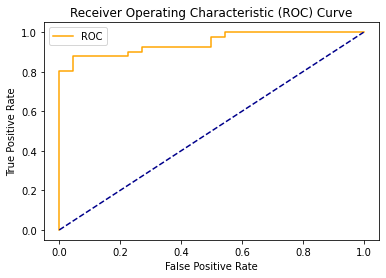

In [19]:
plot_roc_curve(fpr,tpr)

In [20]:
pred

[0     0.66
 1     0.92
 2     0.98
 3     0.40
 4     0.99
       ... 
 58    0.05
 59    0.91
 60    0.97
 61    0.92
 62    0.39
 Length: 63, dtype: float64,
 0     0.903046
 1     0.981051
 2     0.997899
 3     0.015143
 4     0.997166
         ...   
 58    0.054852
 59    0.981497
 60    0.917718
 61    0.826862
 62    0.387205
 Length: 63, dtype: float64,
 0     0.533145
 1     0.700855
 2     0.734396
 3     0.464258
 4     0.706374
         ...   
 58    0.434102
 59    0.688864
 60    0.691521
 61    0.527358
 62    0.479325
 Length: 63, dtype: float64,
 0     0.4
 1     1.0
 2     1.0
 3     0.4
 4     1.0
      ... 
 58    0.2
 59    0.8
 60    1.0
 61    1.0
 62    0.8
 Length: 63, dtype: float64]